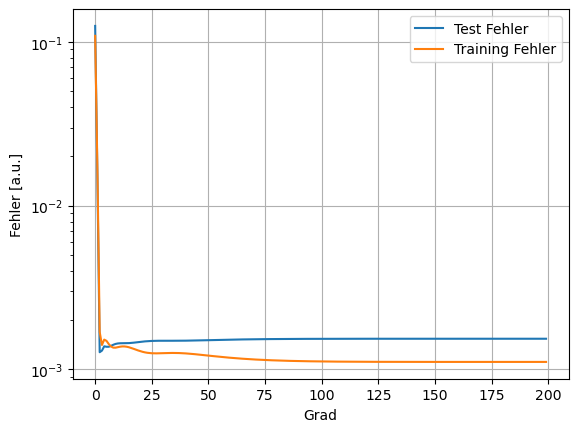

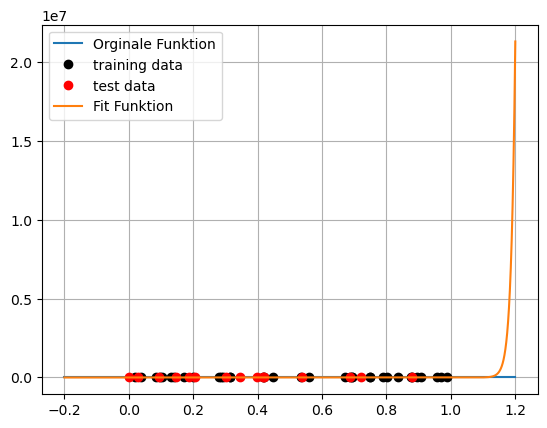

In [25]:
import numpy as np
import pylab as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

TESTSIZE = 0.3
FONTSIZE = 20


def exampleFunction(x):
    return np.sin(2*x) 

def plotFunction(f):
    x = np.linspace(-0.2,1.2,1000)
    plt.plot(x, f(x), label="Orginale Funktion")

def createRandVals(f):
    x = np.random.uniform(size=50)
    eps = np.random.normal(loc=0, scale=0.04 ,size=50)
    y = f(x) + eps
    return x, y

def plotPolynomial(model, deg):
    poly = PolynomialFeatures(degree=deg)
    xLin = np.linspace(-0.2,1.2,1000)
    poly_features = poly.fit_transform(xLin.reshape(-1,1))
    yPlot = model.predict(poly_features)
    plt.plot(xLin, yPlot, label="Fit Funktion")

def splitData(x,y):
    splitVal = int(x.size * TESTSIZE)
    xTest, xTrain = np.split(x, [splitVal], axis=0)
    yTest, yTrain = np.split(y, [splitVal], axis=0)
    return xTest, yTest, xTrain, yTrain

def getError(x, y, model, deg):
    poly = PolynomialFeatures(degree=deg)
    poly_features = poly.fit_transform(x.reshape(-1,1))
    yPred = model.predict(poly_features)
    error = np.mean((yPred-y)**2)
    return error

def fitPoly(x, y, deg, alpha):
    poly = PolynomialFeatures(degree=deg)
    model = Ridge(alpha=alpha, max_iter=10000)

    poly_features = poly.fit_transform(x.reshape(-1,1))
    model.fit(X=poly_features, y=y)
    return model


np.random.seed(1)
x, y = createRandVals(exampleFunction)
xTest, yTest, xTrain, yTrain = splitData(x, y)



degrees = np.arange(200)
errorsTest = []
errorsTrain = []
for deg in degrees:
    poly =  fitPoly(xTrain, yTrain, deg, alpha=0.01)
    errorsTest.append(getError(xTest, yTest, poly, deg))
    errorsTrain.append(getError(xTrain, yTrain, poly, deg))


plt.semilogy(degrees, errorsTest, label="Test Fehler")
plt.semilogy(degrees, errorsTrain, label="Training Fehler")
plt
plt.grid()
plt.legend()
plt.xlabel("Grad")
plt.ylabel("Fehler [a.u.]")
plt.show()

plotFunction(exampleFunction)
plt.plot(xTrain, yTrain, "o", label="training data", ls="", color="black" )
plt.plot(xTest, yTest, "o", label="test data", ls="", color="red" )
deg=100
poly =  fitPoly(xTrain, yTrain, deg, 0.01)
plotPolynomial(poly, deg=deg)
plt.legend()
plt.grid()
plt.show()

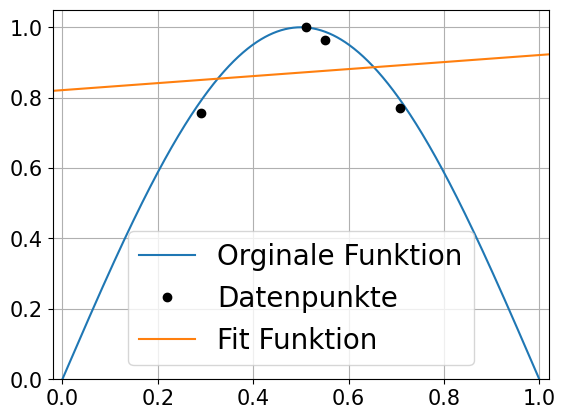

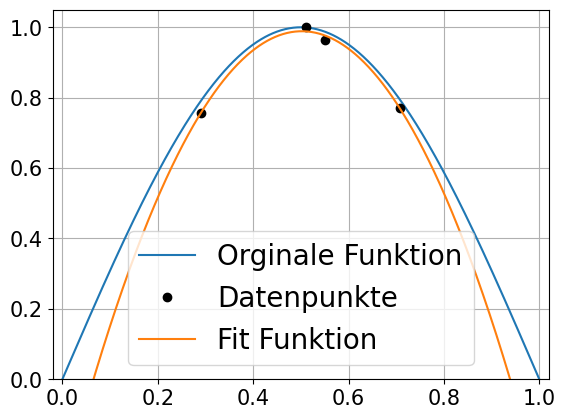

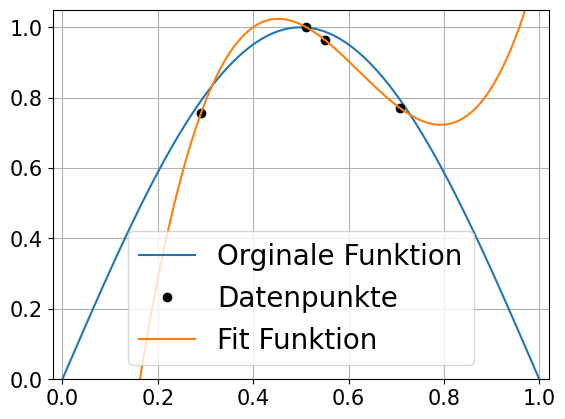

In [41]:
def quad(x):
    return np.sin(x*np.pi)



np.random.seed(3)
x_all, y_all = createRandVals(quad)

x = x_all[:4]
y = y_all[:4]
FONTSIZE = 20


for deg in [1,2,3]:
    poly =  fitPoly(x, y, deg, alpha=0.0)
    plotFunction(quad)
    plt.plot(x, y, "o", label="Datenpunkte", ls="", color="black" )
    plotPolynomial(poly, deg=deg)
    plt.legend(fontsize=FONTSIZE)
    plt.grid()
    #plt.xlabel("x", fontsize=FONTSIZE)
    #plt.ylabel("y", fontsize=FONTSIZE)
    plt.tick_params("both", labelsize=FONTSIZE//4*3)
    plt.ylim(0.0, 1.05)
    plt.xlim(-0.02, 1.02)
    plt.savefig("plots/fittingexample" + str(deg))
    plt.show()
